# Import Dataset

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning Datasets

In [62]:
df = pd.read_csv('spotify-2023.csv')
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


### Handling Missing Value

In [63]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [64]:
clean_df = df.dropna()

In [65]:
clean_df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [66]:
clean_df.shape

(817, 24)

In [67]:
clean_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

# Data Preparation

### Replace Values

In [68]:
key_mapping = {
    'A'  : 0,
    'A#' : 1,
    'B'  : 2,
    'C#' : 3,
    'D'  : 4,
    'D#' : 5,
    'E'  : 6,
    'F'  : 7,
    'F#' : 8,
    'G'  : 9,
    'G#' : 10
}

mode_mapping = {
    'Major' : 0,
    'Minor' : 1
}

clean_df['key'] = clean_df['key'].map(key_mapping)
clean_df['mode'] = clean_df['mode'].map(mode_mapping)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15324\3061141456.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['key'] = clean_df['key'].map(key_mapping)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15324\3061141456.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['mode'] = clean_df['mode'].map(mode_mapping)


In [69]:
clean_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,2,0,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,3,0,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,7,0,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,0,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,0,1,65,23,80,14,63,11,6


### Correlation Matrix

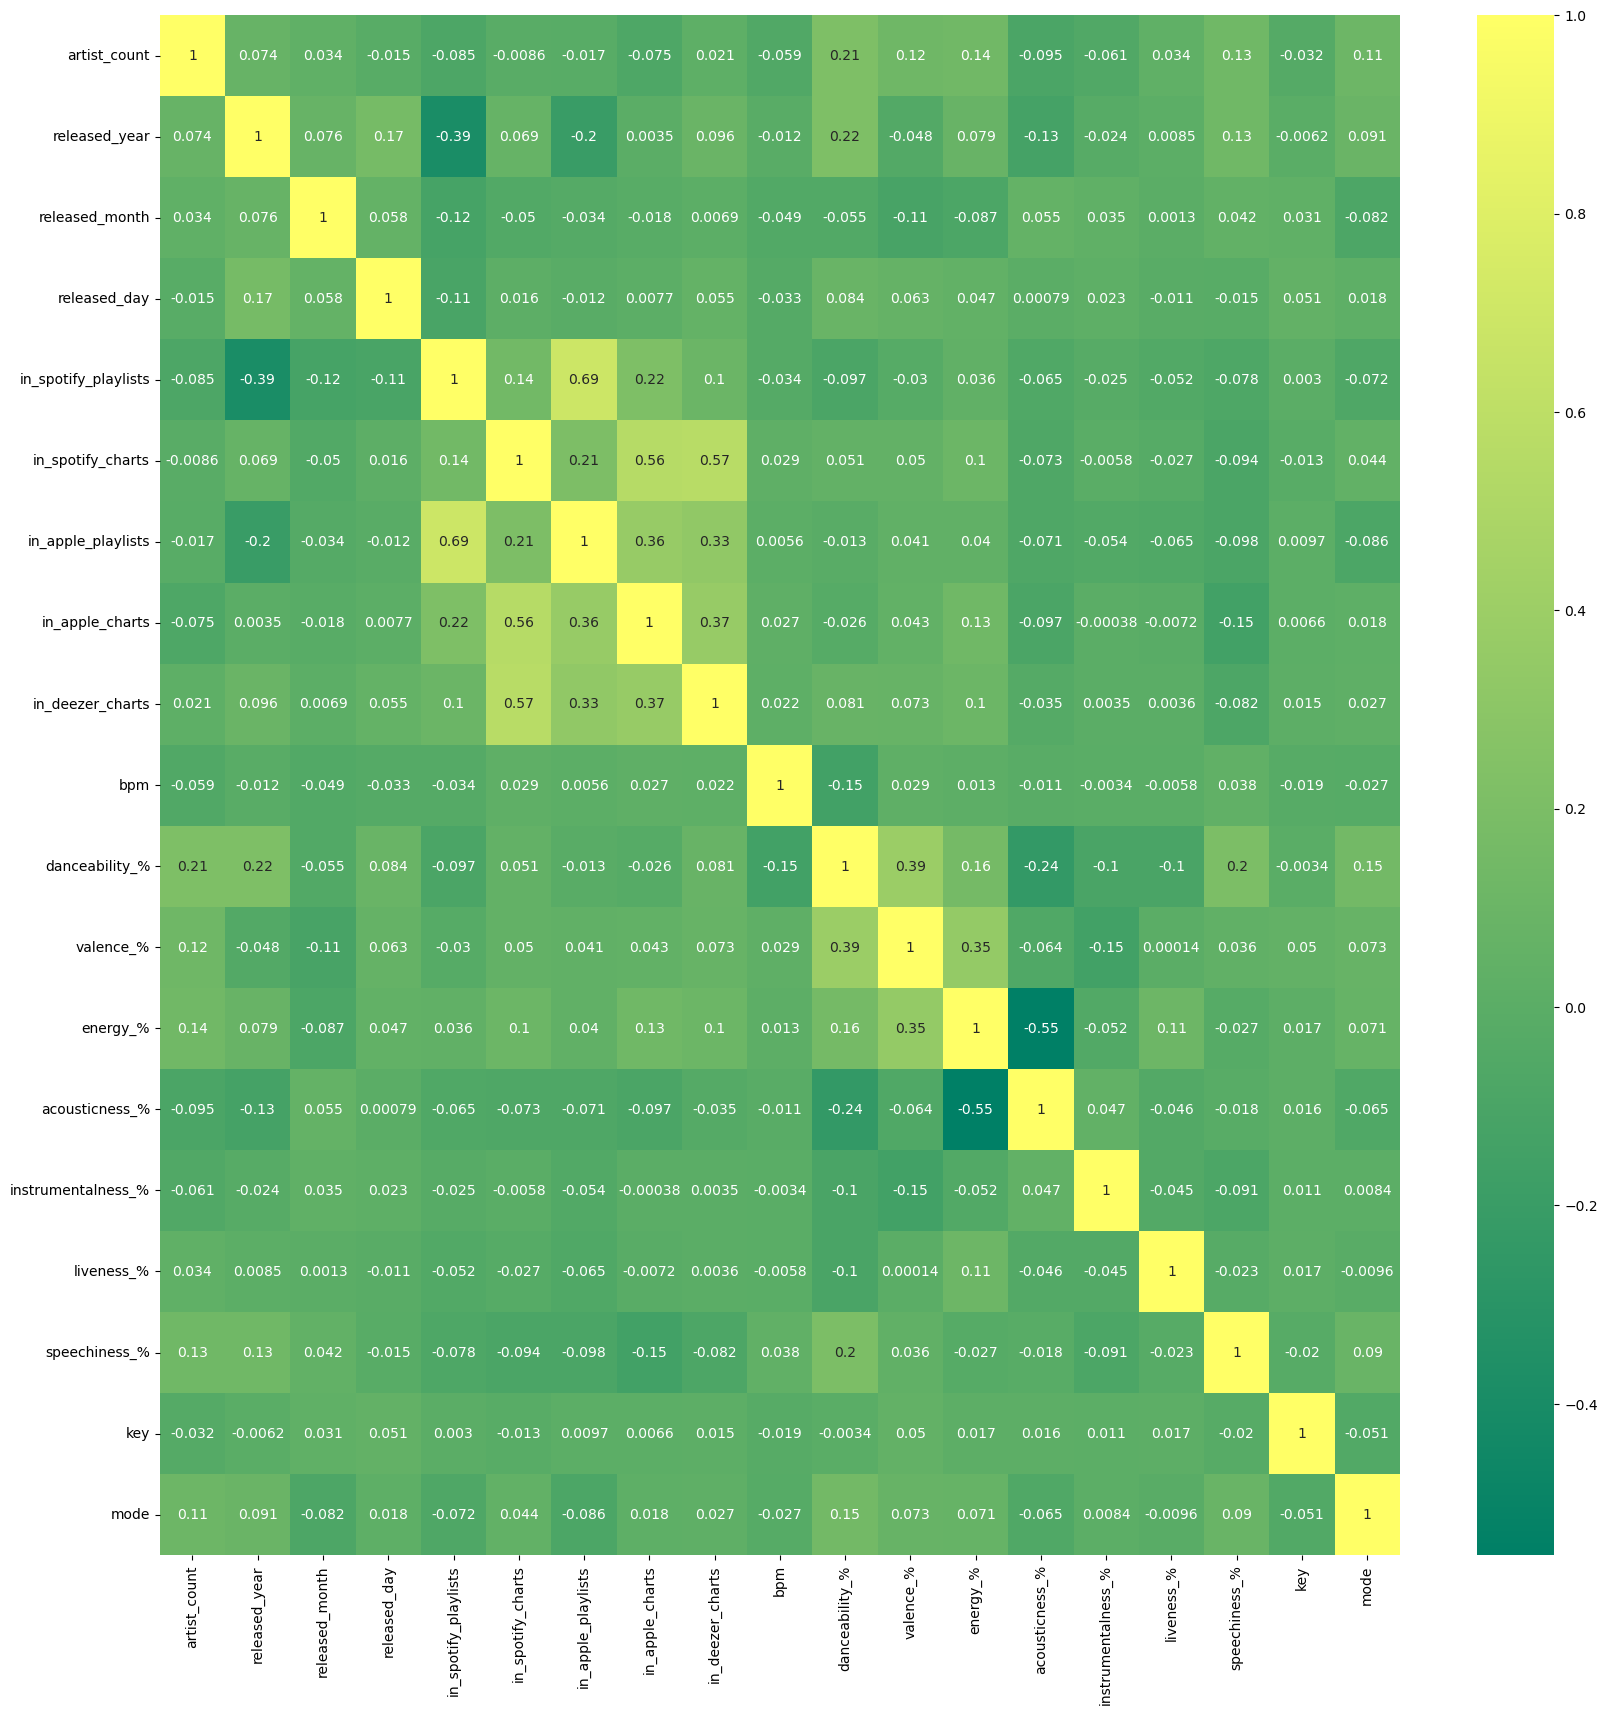

In [87]:
plt.figure(figsize = (20,20))
corr = clean_df[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
                'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key', 'mode']].corr()
dataplot = sns.heatmap(corr, annot=True, cmap='summer')
plt.show()

# Make K-Means Model

### Find the optimal cluster value

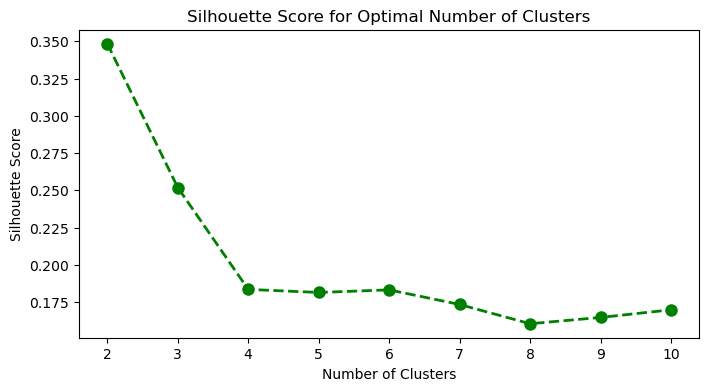

In [90]:
features = clean_df[['in_apple_playlists', 'in_spotify_playlists', 'in_apple_charts', 'in_spotify_charts',
                    'in_deezer_charts', 'in_apple_playlists', 'in_apple_charts', 'valence_%', 'danceability_%',
                    'energy_%']]

# Data Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = []

# Try cluster from 2 to 11
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

# Plot of Silhouette Score Values
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', linestyle='dashed', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

### Make The Model

C:\Users\Asus\AppData\Local\Temp\ipykernel_15324\4118400460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cluster'] = kmeans.labels_
C:\Users\Asus\AppData\Local\Temp\ipykernel_15324\4118400460.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['PC1'] = principal_components[:, 0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_15324\4118400460.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

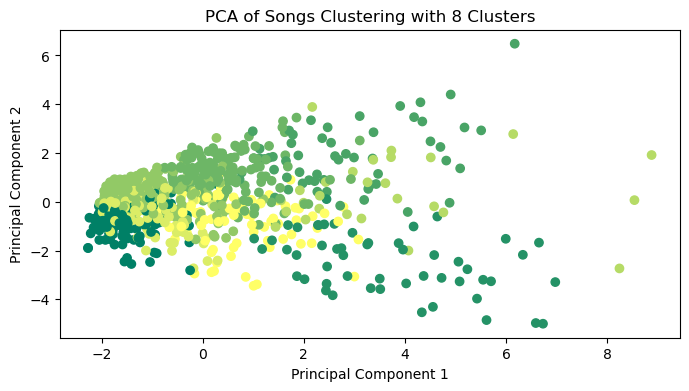

In [79]:
# Determine cluster value
n_clusters = 8

# Make K-Means Model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_features)

# Add cluster label to dataset
clean_df['Cluster'] = kmeans.labels_

# Make PCA for dimension reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add principal compenent to dataset
clean_df['PC1'] = principal_components[:, 0]
clean_df['PC2'] = principal_components[:, 1]

# Plot the clustering
plt.figure(figsize=(8, 4))
scatter = plt.scatter(clean_df['PC1'], clean_df['PC2'], c=clean_df['Cluster'], cmap='summer')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Songs Clustering with 8 Clusters')
plt.show()

### Get Silhoutte Score

In [80]:
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1605111062733364


# Get Recommendations

In [82]:
artist = 'Taylor Swift'
title = 'Cruel Summer'

reference_song = clean_df[(clean_df['artist(s)_name'] == artist) & (clean_df['track_name'] == title)]
reference_cluster = reference_song['Cluster'].iloc[0]

recommended_songs = clean_df[clean_df['Cluster'] == reference_cluster]
recommended_songs = recommended_songs[~((recommended_songs['artist(s)_name'] == artist) & (recommended_songs['track_name'] == title))].head(5)

print("Recommended Songs from", artist, "-", title)
for idx, song in recommended_songs.iterrows():
    print(f"- {song['artist(s)_name']} - {song['track_name']}")


Recommended Songs from Taylor Swift - Cruel Summer
- Latto, Jung Kook - Seven (feat. Latto) (Explicit Ver.)
- Myke Towers - LALA
- Olivia Rodrigo - vampire
- Bad Bunny - WHERE SHE GOES
- Dave, Central Cee - Sprinter
